## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [77]:
import tensorflow as tf

In [78]:
# loading the datset 
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [79]:
# shape of the training dataset
x_train.shape[0]

60000

In [80]:
# shape of the test dataset
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [81]:
# dimension of the image (height * width)
x_train.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [82]:
# one hot encoding the train
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [83]:
# one hot encoding the test
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [84]:
print(y_train.shape[1])
print(y_test.shape[1])

10
10


### Normalize both the train and test image data from 0-255 to 0-1

In [85]:
# normalizing the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [86]:
x_train/= 255
x_test/= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [87]:
# reshaping the data
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [88]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, Activation, Dropout, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [90]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu' ))
model.add(Dense(10, activation='softmax' ))

In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
import keras
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=5, verbose=1, mode ='auto')
callback_list = [early_stopping]

In [93]:
model.fit(x_train, y_train, batch_size=500, epochs=20, validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/20
120/120 [==============================] - 2s 18ms/step - loss: 0.8174 - accuracy: 0.7162 - val_loss: 0.3962 - val_accuracy: 0.8563
Epoch 2/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3425 - accuracy: 0.8789 - val_loss: 0.3483 - val_accuracy: 0.8718
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2831 - accuracy: 0.8981 - val_loss: 0.3046 - val_accuracy: 0.8861
Epoch 4/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2404 - accuracy: 0.9130 - val_loss: 0.2741 - val_accuracy: 0.9029
Epoch 5/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2106 - accuracy: 0.9235 - val_loss: 0.2718 - val_accuracy: 0.9015
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1858 - accuracy: 0.9318 - val_loss: 0.2626 - val_accuracy: 0.9069
Epoch 7/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1677 - accuracy: 0.9402 - val_loss: 0.2620 - val_accuracy: 0.9098

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [95]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu' ))
model_2.add(Dense(10, activation='softmax' ))

In [96]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
early_stopping_2 = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=5, verbose=1, mode ='auto')
callback_list_2 = [early_stopping_2]

In [98]:
model_2.fit(x_train, y_train, batch_size=500, epochs=20, validation_data=(x_test, y_test), callbacks=callback_list_2)

Epoch 1/20
120/120 [==============================] - 2s 17ms/step - loss: 0.9260 - accuracy: 0.6838 - val_loss: 0.4201 - val_accuracy: 0.8502
Epoch 2/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3879 - accuracy: 0.8626 - val_loss: 0.3588 - val_accuracy: 0.8729
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3290 - accuracy: 0.8832 - val_loss: 0.3195 - val_accuracy: 0.8860
Epoch 4/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2884 - accuracy: 0.8986 - val_loss: 0.2951 - val_accuracy: 0.8963
Epoch 5/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2657 - accuracy: 0.9045 - val_loss: 0.2694 - val_accuracy: 0.9030
Epoch 6/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2419 - accuracy: 0.9106 - val_loss: 0.2732 - val_accuracy: 0.9030
Epoch 7/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2283 - accuracy: 0.9182 - val_loss: 0.2708 - val_accuracy: 0.9010

In [99]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [100]:
from keras.preprocessing.image import ImageDataGenerator

In [101]:
# this generates batches of image data with real-time data augmentation

datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to be 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=50, # randomly rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=False, # randomly flip images horizontally
    vertical_flip=False # randomly flip images vertically
)

# prepare the generator
datagen.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

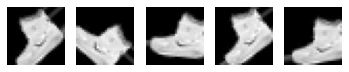

In [102]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [103]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_3.add(Conv2D(32, (3,3), activation='relu'))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu' ))
model_3.add(Dense(10, activation='softmax' ))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_3 = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=5, verbose=1, mode ='auto')
callback_list_3 = [early_stopping_3]

model_3.fit_generator(datagen.flow(x_train, y_train, 
                                 batch_size=32), 
                                 steps_per_epoch = x_train.shape[0]/32,
                                 epochs= 20,
                                 validation_data =(x_test, y_test),
                                 callbacks=callback_list_3)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.9932 - accuracy: 0.6380 - val_loss: 0.5506 - val_accuracy: 0.7970
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6057 - accuracy: 0.7726 - val_loss: 0.4925 - val_accuracy: 0.8246
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5271 - accuracy: 0.8004 - val_loss: 0.4829 - val_accuracy: 0.8185
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4831 - accuracy: 0.8188 - val_loss: 0.4080 - val_accuracy: 0.8507
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4526 - accuracy: 0.8334 - val_loss: 0.4277 - val_accuracy: 0.8387
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4315 - accuracy: 0.8400 - val_loss: 0.3899 - val_accuracy: 0.8590
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4160 - accuracy: 0.8453 - val_loss: 0.3739 - 

###  Report the final train and validation accuracy

In [104]:
model_3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3054 - accuracy: 0.8915


[0.30540210008621216, 0.8914999961853027]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [105]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [106]:
from keras.datasets import cifar10
(x_train_cif, y_train_cif), (x_test_cif, y_test_cif) = cifar10.load_data()

In [107]:
# shape of the training dataset
x_train_cif.shape[0]

50000

In [108]:
# shape of the testing dataset
x_test_cif.shape[0]

10000

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [109]:
# this generates batches of image data with real-time data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to be 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=50, # randomly rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=True # randomly flip images vertically
)

### **Prepare/fit the generator.**

In [110]:
# prepare the generator
datagen.fit(x_train_cif)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

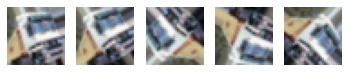

In [112]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_cif[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype('uint8').squeeze())
    plt.plot()
plt.show()